In [1]:
#importing basic libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import time #import time library as we will need to use it to check the runtime of our model
from datetime import timedelta
from tempfile import mkdtemp

pd.set_option('display.max_columns', None)

In [2]:
from sklearn.model_selection import train_test_split

In [3]:
df = pd.read_csv('train.csv')

In [4]:
df

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0        1          60       RL         65.0     8450   Pave   NaN      Reg   
1        2          20       RL         80.0     9600   Pave   NaN      Reg   
2        3          60       RL         68.0    11250   Pave   NaN      IR1   
3        4          70       RL         60.0     9550   Pave   NaN      IR1   
4        5          60       RL         84.0    14260   Pave   NaN      IR1   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1455  1456          60       RL         62.0     7917   Pave   NaN      Reg   
1456  1457          20       RL         85.0    13175   Pave   NaN      Reg   
1457  1458          70       RL         66.0     9042   Pave   NaN      Reg   
1458  1459          20       RL         68.0     9717   Pave   NaN      Reg   
1459  1460          20       RL         75.0     9937   Pave   NaN      Reg   

     LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0            Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1            Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2            Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3            Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4            Lvl    AllPub       FR2       Gtl      NoRidge       Norm   
...          ...       ...       ...       ...          ...        ...   
1455         Lvl    AllPub    Inside       Gtl      Gilbert       Norm   
1456         Lvl    AllPub    Inside       Gtl       NWAmes       Norm   
1457         Lvl    AllPub    Inside       Gtl      Crawfor       Norm   
1458         Lvl    AllPub    Inside       Gtl        NAmes       Norm   
1459         Lvl    AllPub    Inside       Gtl      Edwards       Norm   

     Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0          Norm     1Fam     2Story            7            5       2003   
1          Norm     1Fam     1Story            6            8       1976   
2          Norm     1Fam     2Story            7            5       2001   
3          Norm     1Fam     2Story            7            5       1915   
4          Norm     1Fam     2Story            8            5       2000   
...         ...      ...        ...          ...          ...        ...   
1455       Norm     1Fam     2Story            6            5       1999   
1456       Norm     1Fam     1Story            6            6       1978   
1457       Norm     1Fam     2Story            7            9       1941   
1458       Norm     1Fam     1Story            5            6       1950   
1459       Norm     1Fam     1Story            5            6       1965   

      YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0             2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1             1976     Gable  CompShg     MetalSd     MetalSd       None   
2             2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3             1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4             2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   
...            ...       ...      ...         ...         ...        ...   
1455          2000     Gable  CompShg     VinylSd     VinylSd       None   
1456          1988     Gable  CompShg     Plywood     Plywood      Stone   
1457          2006     Gable  CompShg     CemntBd     CmentBd       None   
1458          1996       Hip  CompShg     MetalSd     MetalSd       None   
1459          1965     Gable  CompShg     HdBoard     HdBoard       None   

      MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond  \
0          196.0        Gd        TA      PConc       Gd       TA   
1            0.0        TA        TA     CBlock       Gd       TA   
2          162.0        Gd        TA      PConc       Gd       TA   
3            0.0        TA        TA     BrkTil       TA       Gd   

## Game plan
- Cleaning data (null values, data type, correlation, scatter plot...)
- Basic ML (Linear, SVC, Random forest...)
- Neural network...
- Final report

# 1. Data cleaning

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [6]:
null_data = pd.DataFrame(data = df.isnull().sum(), columns = ['Num_empty'])

In [7]:
null_data = null_data[null_data['Num_empty']>0]
null_data

Num_empty
LotFrontage         259
Alley              1369
MasVnrType            8
MasVnrArea            8
BsmtQual             37
BsmtCond             37
BsmtExposure         38
BsmtFinType1         37
BsmtFinType2         38
Electrical            1
FireplaceQu         690
GarageType           81
GarageYrBlt          81
GarageFinish         81
GarageQual           81
GarageCond           81
PoolQC             1453
Fence              1179
MiscFeature        1406

Columns that have NA as a right value:
- Alley
- MasVnrType
- MasVnrArea	
- BsmtQual
- BsmtCond
- BsmtExposure: 
- BsmtFinType1: 
- BsmtFinType2: 
- FireplaceQu: 
- GarageType: 
- GarageYrBlt
- GarageFinish: 
- GarageQual: 
- GarageCond: 
- PoolQC: 
- Fence: 
- MiscFeature: 

So we have only 1 empty values in electrical, we can safely remove it and convert the null values in these columns to the right values

In [8]:
null_data.index

Index(['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence',
       'MiscFeature'],
      dtype='object')

In [9]:
numeric_replace = ['LotFrontage', 'MasVnrArea','GarageYrBlt']
object_replace = ['Alley', 'MasVnrType', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'FireplaceQu', 'GarageType', 
       'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence',
       'MiscFeature']

In [10]:
for i in numeric_replace:
    df[i].fillna(0, inplace = True)

In [11]:
for i in object_replace:
    df[i].fillna('NA', inplace = True)

In [12]:
df.isnull().sum().sum()

1

In [13]:
df.dropna(inplace = True)

In [14]:
df.corr()

Id  MSSubClass  LotFrontage   LotArea  OverallQual  \
Id             1.000000    0.010589    -0.020248 -0.033170    -0.027553   
MSSubClass     0.010589    1.000000    -0.215226 -0.139766     0.032936   
LotFrontage   -0.020248   -0.215226     1.000000  0.100770     0.176853   
LotArea       -0.033170   -0.139766     0.100770  1.000000     0.105786   
OverallQual   -0.027553    0.032936     0.176853  0.105786     1.000000   
OverallCond    0.013167   -0.059134    -0.053308 -0.005665    -0.092243   
YearBuilt     -0.013945    0.027435     0.036523  0.014296     0.573334   
YearRemodAdd  -0.023158    0.040199     0.078396  0.013852     0.551605   
MasVnrArea    -0.050515    0.023792     0.105202  0.103302     0.407075   
BsmtFinSF1    -0.004001   -0.069501     0.076996  0.214121     0.239265   
BsmtFinSF2    -0.005668   -0.065549    -0.009225  0.111158    -0.059291   
BsmtUnfSF     -0.007508   -0.140627     0.160976 -0.002641     0.308018   
TotalBsmtSF   -0.013815   -0.238160     0.238950  0.260962     0.537523   
1stFlrSF       0.011627   -0.251484     0.245613  0.299533     0.475933   
2ndFlrSF       0.004885    0.307713     0.042354  0.051030     0.295969   
LowQualFinSF  -0.044139    0.046524     0.050022  0.004773    -0.030502   
GrLivArea      0.008524    0.074949     0.220436  0.263109     0.593021   
BsmtFullBath   0.003158    0.003799     0.010767  0.158147     0.110700   
BsmtHalfBath  -0.019917   -0.002243    -0.027785  0.048034    -0.040291   
FullBath       0.004758    0.131354     0.120342  0.126100     0.551267   
HalfBath       0.005494    0.177004    -0.013333  0.014333     0.274328   
BedroomAbvGr   0.037577   -0.023502     0.144455  0.119700     0.101789   
KitchenAbvGr   0.003177    0.281833     0.034492 -0.017796    -0.184040   
TotRmsAbvGrd   0.026948    0.040274     0.221328  0.190037     0.427720   
Fireplaces    -0.018788   -0.045232     0.044324  0.271398     0.396455   
GarageYrBlt    0.013180   -0.081122     0.019226  0.072618     0.289236   
GarageCars     0.016254   -0.040232     0.165150  0.154893     0.600991   
GarageArea     0.018010   -0.098558     0.201599  0.180392     0.561980   
WoodDeckSF    -0.029716   -0.012598    -0.016795  0.171701     0.239000   
OpenPorchSF    0.000267   -0.005838     0.069836  0.084751     0.308554   
EnclosedPorch  0.003272   -0.011904     0.027478 -0.018360    -0.114162   
3SsnPorch     -0.046550   -0.043786     0.023536  0.020417     0.030314   
ScreenPorch    0.001617   -0.025932     0.023053  0.043147     0.064755   
PoolArea       0.057163    0.008309     0.114135  0.077669     0.065143   
MiscVal       -0.006155   -0.007651    -0.059583  0.038063    -0.031461   
MoSold         0.021708   -0.013404     0.019094  0.001179     0.070570   
YrSold         0.000566   -0.021461    -0.012137 -0.014254    -0.027277   
SalePrice     -0.021756   -0.084230     0.209692  0.263837     0.791069   

               OverallCond  YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  \
Id                0.013167  -0.013945     -0.023158   -0.050515   -0.004001   
MSSubClass       -0.059134   0.027435      0.040199    0.023792   -0.069501   
LotFrontage      -0.053308   0.036523      0.078396    0.105202    0.076996   
LotArea          -0.005665   0.014296      0.013852    0.103302    0.214121   
OverallQual      -0.092243   0.573334      0.551605    0.407075    0.239265   
OverallCond       1.000000  -0.375780      0.074158   -0.125922   -0.046595   
YearBuilt        -0.375780   1.000000      0.592512    0.312227    0.250465   
YearRemodAdd      0.074158   0.592512      1.000000    0.177038    0.129259   
MasVnrArea       -0.125922   0.312227      0.177038    1.000000    0.260989   
BsmtFinSF1       -0.046595   0.250465      0.129259    0.260989    1.000000   
BsmtFinSF2        0.040132  -0.048903     -0.067575   -0.071453   -0.050328   
BsmtUnfSF        -0.137008   0.149444      0.181520    0.113719   -0.495718   
TotalBsmtSF      -0.171796   0.393159      0.292546    0.359798    0

corrmat = df.corr() # creating correlation variable to use in chart
mask = np.triu(corrmat) # as corellation chart are symetrical, we use a mask to only get half the chart
f, ax = plt.subplots(figsize=(20, 20)) #set up canvas size
ax = sns.heatmap(corrmat, # correlation data
                 vmax=1, #color map setup
                 cmap="coolwarm", #colormap
                 square=True, #make each value to be the same shape
                 annot=True,fmt = '.2f',  #showing values inside square
                 linewidth=2, 
                 mask = mask) # showing only half the map
plt.title('Correlation of demographic data with Republican relative votes share in 2012', fontsize = 15) #set Chart title
plt.show()

In [15]:
object_col = []
num_col = []
for i in df.columns:
    if df[i].dtypes == 'object':
        object_col.append(i)
    else:
        num_col.append(i)

fig = plt.figure(figsize = (30,90)) #set up figure size
for i in range(len(num_col)): # iterate through all the columns of rep16n df
    ax = fig.add_subplot (20,5,i+1) #iterate through subplot
    ax = sns.scatterplot(df['SalePrice'], df[num_col[i]]) #scatter plot between `relative_votes` and other variables
    ax.axes.yaxis.set_visible(False) #remove the yaxis unit as we only care about the trend here
    ax.axes.xaxis.set_visible(False)
    plt.title(num_col[i]) #change the title of each plot to respective columns

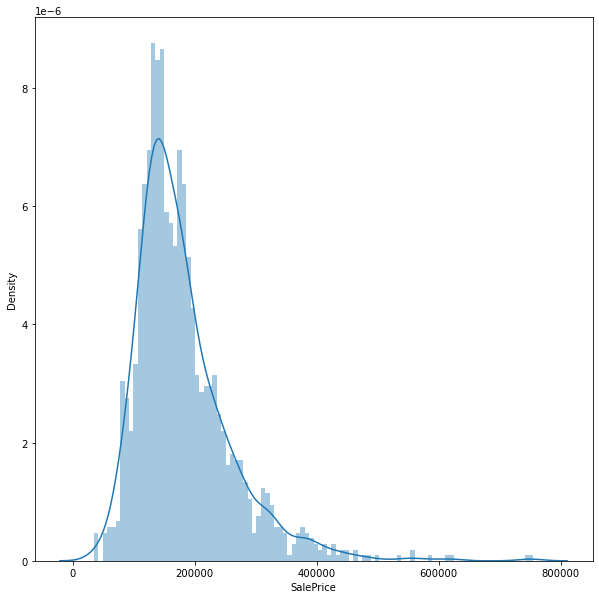

In [16]:
plt.figure(figsize = (10,10))
sns.distplot(df['SalePrice'], bins = 100)
plt.show()

# 2. Data preparing

We will need to encode the categorical data by 2 method:
- For the features that doesnt have any structure, we can use one-hot encoding.
- For the features that have ordinal structure, we can use ordinal encoding.

In [17]:
df_raw = df.copy()

In [18]:
y = df['SalePrice']
df = df.drop(['SalePrice'], axis =1)

In [19]:
df

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0        1          60       RL         65.0     8450   Pave    NA      Reg   
1        2          20       RL         80.0     9600   Pave    NA      Reg   
2        3          60       RL         68.0    11250   Pave    NA      IR1   
3        4          70       RL         60.0     9550   Pave    NA      IR1   
4        5          60       RL         84.0    14260   Pave    NA      IR1   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1455  1456          60       RL         62.0     7917   Pave    NA      Reg   
1456  1457          20       RL         85.0    13175   Pave    NA      Reg   
1457  1458          70       RL         66.0     9042   Pave    NA      Reg   
1458  1459          20       RL         68.0     9717   Pave    NA      Reg   
1459  1460          20       RL         75.0     9937   Pave    NA      Reg   

     LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0            Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1            Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2            Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3            Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4            Lvl    AllPub       FR2       Gtl      NoRidge       Norm   
...          ...       ...       ...       ...          ...        ...   
1455         Lvl    AllPub    Inside       Gtl      Gilbert       Norm   
1456         Lvl    AllPub    Inside       Gtl       NWAmes       Norm   
1457         Lvl    AllPub    Inside       Gtl      Crawfor       Norm   
1458         Lvl    AllPub    Inside       Gtl        NAmes       Norm   
1459         Lvl    AllPub    Inside       Gtl      Edwards       Norm   

     Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0          Norm     1Fam     2Story            7            5       2003   
1          Norm     1Fam     1Story            6            8       1976   
2          Norm     1Fam     2Story            7            5       2001   
3          Norm     1Fam     2Story            7            5       1915   
4          Norm     1Fam     2Story            8            5       2000   
...         ...      ...        ...          ...          ...        ...   
1455       Norm     1Fam     2Story            6            5       1999   
1456       Norm     1Fam     1Story            6            6       1978   
1457       Norm     1Fam     2Story            7            9       1941   
1458       Norm     1Fam     1Story            5            6       1950   
1459       Norm     1Fam     1Story            5            6       1965   

      YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0             2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1             1976     Gable  CompShg     MetalSd     MetalSd       None   
2             2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3             1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4             2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   
...            ...       ...      ...         ...         ...        ...   
1455          2000     Gable  CompShg     VinylSd     VinylSd       None   
1456          1988     Gable  CompShg     Plywood     Plywood      Stone   
1457          2006     Gable  CompShg     CemntBd     CmentBd       None   
1458          1996       Hip  CompShg     MetalSd     MetalSd       None   
1459          1965     Gable  CompShg     HdBoard     HdBoard       None   

      MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond  \
0          196.0        Gd        TA      PConc       Gd       TA   
1            0.0        TA        TA     CBlock       Gd       TA   
2          162.0        Gd        TA      PConc       Gd       TA   
3            0.0        TA        TA     BrkTil       TA       Gd   

In [20]:
data_type = pd.DataFrame(data = df.dtypes, columns = ['Data_type'])
num_col = data_type[data_type['Data_type'] != 'object']
num_col

Data_type
Id                int64
MSSubClass        int64
LotFrontage     float64
LotArea           int64
OverallQual       int64
OverallCond       int64
YearBuilt         int64
YearRemodAdd      int64
MasVnrArea      float64
BsmtFinSF1        int64
BsmtFinSF2        int64
BsmtUnfSF         int64
TotalBsmtSF       int64
1stFlrSF          int64
2ndFlrSF          int64
LowQualFinSF      int64
GrLivArea         int64
BsmtFullBath      int64
BsmtHalfBath      int64
FullBath          int64
HalfBath          int64
BedroomAbvGr      int64
KitchenAbvGr      int64
TotRmsAbvGrd      int64
Fireplaces        int64
GarageYrBlt     float64
GarageCars        int64
GarageArea        int64
WoodDeckSF        int64
OpenPorchSF       int64
EnclosedPorch     int64
3SsnPorch         int64
ScreenPorch       int64
PoolArea          int64
MiscVal           int64
MoSold            int64
YrSold            int64

In [21]:
obj_col = data_type[data_type['Data_type'] == 'object']
obj_col

Data_type
MSZoning         object
Street           object
Alley            object
LotShape         object
LandContour      object
Utilities        object
LotConfig        object
LandSlope        object
Neighborhood     object
Condition1       object
Condition2       object
BldgType         object
HouseStyle       object
RoofStyle        object
RoofMatl         object
Exterior1st      object
Exterior2nd      object
MasVnrType       object
ExterQual        object
ExterCond        object
Foundation       object
BsmtQual         object
BsmtCond         object
BsmtExposure     object
BsmtFinType1     object
BsmtFinType2     object
Heating          object
HeatingQC        object
CentralAir       object
Electrical       object
KitchenQual      object
Functional       object
FireplaceQu      object
GarageType       object
GarageFinish     object
GarageQual       object
GarageCond       object
PavedDrive       object
PoolQC           object
Fence            object
MiscFeature      object
SaleType         object
SaleCondition    object

In [22]:
one_hot_col = ['MSZoning', 'Street', 'Alley', 'LandContour', 'LotConfig', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 
              'Foundation', 'Heating', 'GarageType', 'PavedDrive', 'MiscFeature', 'SaleType', 'SaleCondition']

In [23]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

# Create the column transformations list + columns to which to apply
col_transforms = [('MSZoning', OneHotEncoder(), ['MSZoning']),
                  ('Street', OneHotEncoder(), ['Street']),
                  ('Alley', OneHotEncoder(), ['Alley']),
                  ('LandContour', OneHotEncoder(), ['LandContour']),
                  ('LotConfig', OneHotEncoder(), ['LotConfig']),
                  ('Neighborhood', OneHotEncoder(), ['Neighborhood']),
                  ('Condition1', OneHotEncoder(), ['Condition1']),
                  ('Condition2', OneHotEncoder(), ['Condition2']),
                  ('BldgType', OneHotEncoder(), ['BldgType']),
                  ('RoofStyle', OneHotEncoder(), ['RoofStyle']),
                  ('RoofMatl', OneHotEncoder(), ['RoofMatl']),
                  ('Exterior1st', OneHotEncoder(), ['Exterior1st']),
                  ('Exterior2nd', OneHotEncoder(), ['Exterior2nd']),
                  ('MasVnrType', OneHotEncoder(), ['MasVnrType']),
                  ('Foundation', OneHotEncoder(), ['Foundation']),
                  ('Heating', OneHotEncoder(), ['Heating']),
                  ('GarageType', OneHotEncoder(), ['GarageType']),
                  ('PavedDrive', OneHotEncoder(), ['PavedDrive']),
                  ('MiscFeature', OneHotEncoder(), ['MiscFeature']),
                  ('SaleType', OneHotEncoder(), ['SaleType']),
                  ('SaleCondition', OneHotEncoder(), ['SaleCondition'])
                 ]


# Create the column transformer
col_trans = ColumnTransformer(col_transforms)

# Fit
col_trans = col_trans.fit(df)
#transform
col_trans_matrix = col_trans.transform(df)

In [24]:
col_trans_matrix

<1459x158 sparse matrix of type '<class 'numpy.float64'>'
	with 30639 stored elements in Compressed Sparse Row format>

In [25]:
df.shape

(1459, 80)

In [26]:
#revert back to df 
df_oh_encoded = pd.DataFrame.sparse.from_spmatrix(col_trans_matrix, columns = col_trans.get_feature_names())

In [27]:
df_oh_encoded.shape

(1459, 158)

#### Ordinal Encoded

In [28]:
ordinal_col = list(set(obj_col.index)-set(one_hot_col))
ordinal_col.sort()

In [29]:
from sklearn.preprocessing import OrdinalEncoder

In [30]:
def ordinal_tran(order, col_name):
    OE = OrdinalEncoder(categories = [order])
    df[col_name] = OE.fit_transform(df[[col_name]])    

In [31]:
BsmtCond_ord = ['NA', 'Po', 'Fa', 'TA', 'Gd', 'Ex']
BsmtExposure_ord = ['NA', 'No', 'Mn', 'Av', 'Gd']
BsmtFinType1_ord = ['NA', 'Unf', 'LwQ', 'Rec', 'BLQ', 'ALQ', 'GLQ']
BsmtFinType2_ord = ['NA', 'Unf', 'LwQ', 'Rec', 'BLQ', 'ALQ', 'GLQ']
BsmtQual_ord = ['NA', 'Po', 'Fa', 'TA', 'Gd', 'Ex']
CentralAir_ord = ['N', 'Y']
Electrical_ord = ['Mix', 'FuseP', 'FuseF', 'FuseA', 'SBrkr']
ExterCond_ord = ['Po', 'Fa', 'TA', 'Gd', 'Ex']
ExterQual_ord = ['Po', 'Fa', 'TA', 'Gd', 'Ex']
Fence_ord = ['NA', 'MnWw', 'GdWo','MnPrv', 'GdPrv']
FireplaceQu_ord = ['NA', 'Po', 'Fa', 'TA', 'Gd', 'Ex']
Functional_ord = ['Sal', 'Sev', 'Maj2', 'Maj1', 'Mod', 'Min2', 'Min1', 'Typ']
GarageCond_ord = ['NA', 'Po', 'Fa', 'TA', 'Gd', 'Ex']
GarageFinish_ord = ['NA', 'Unf', 'RFn', 'Fin']
GarageQual_ord = ['NA', 'Po', 'Fa', 'TA', 'Gd', 'Ex']
HeatingQC_ord = ['Po', 'Fa', 'TA', 'Gd', 'Ex']
HouseStyle_ord = ['1Story', '1.5Fin', '1.5Unf', '2Story', '2.5Fin', '2.5Unf', 'SFoyer', 'SLvl']
KitchenQual_ord = ['Po', 'Fa', 'TA', 'Gd', 'Ex']
LandSlope_ord = ['Sev', 'Mod', 'Gtl']
LotShape_ord = ['IR3', 'IR2', 'IR1', 'Reg']
PoolQC_ord = ['NA', 'Fa', 'TA', 'Gd', 'Ex']
Utilities_ord = ['ELO', 'NoSeWa', 'NoSewr', 'AllPub']

In [32]:
ordinal_list = [BsmtCond_ord,
                BsmtExposure_ord, 
                BsmtFinType1_ord, 
                BsmtFinType2_ord,
                BsmtQual_ord,
                CentralAir_ord,
                Electrical_ord,
                ExterCond_ord,
                ExterQual_ord,
                Fence_ord,
                FireplaceQu_ord,
                Functional_ord,
                GarageCond_ord,
                GarageFinish_ord,
                GarageQual_ord,
                HeatingQC_ord,
                HouseStyle_ord,
                KitchenQual_ord,
                LandSlope_ord,
                LotShape_ord,
                PoolQC_ord,
                Utilities_ord                
               ]

In [33]:
ordinal_col

['BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'BsmtQual',
 'CentralAir',
 'Electrical',
 'ExterCond',
 'ExterQual',
 'Fence',
 'FireplaceQu',
 'Functional',
 'GarageCond',
 'GarageFinish',
 'GarageQual',
 'HeatingQC',
 'HouseStyle',
 'KitchenQual',
 'LandSlope',
 'LotShape',
 'PoolQC',
 'Utilities']

In [34]:
for i in range(len(ordinal_col)):
    ordinal_tran(ordinal_list[i], ordinal_col[i])

In [35]:
df

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley  LotShape  \
0        1          60       RL         65.0     8450   Pave    NA       3.0   
1        2          20       RL         80.0     9600   Pave    NA       3.0   
2        3          60       RL         68.0    11250   Pave    NA       2.0   
3        4          70       RL         60.0     9550   Pave    NA       2.0   
4        5          60       RL         84.0    14260   Pave    NA       2.0   
...    ...         ...      ...          ...      ...    ...   ...       ...   
1455  1456          60       RL         62.0     7917   Pave    NA       3.0   
1456  1457          20       RL         85.0    13175   Pave    NA       3.0   
1457  1458          70       RL         66.0     9042   Pave    NA       3.0   
1458  1459          20       RL         68.0     9717   Pave    NA       3.0   
1459  1460          20       RL         75.0     9937   Pave    NA       3.0   

     LandContour  Utilities LotConfig  LandSlope Neighborhood Condition1  \
0            Lvl        3.0    Inside        2.0      CollgCr       Norm   
1            Lvl        3.0       FR2        2.0      Veenker      Feedr   
2            Lvl        3.0    Inside        2.0      CollgCr       Norm   
3            Lvl        3.0    Corner        2.0      Crawfor       Norm   
4            Lvl        3.0       FR2        2.0      NoRidge       Norm   
...          ...        ...       ...        ...          ...        ...   
1455         Lvl        3.0    Inside        2.0      Gilbert       Norm   
1456         Lvl        3.0    Inside        2.0       NWAmes       Norm   
1457         Lvl        3.0    Inside        2.0      Crawfor       Norm   
1458         Lvl        3.0    Inside        2.0        NAmes       Norm   
1459         Lvl        3.0    Inside        2.0      Edwards       Norm   

     Condition2 BldgType  HouseStyle  OverallQual  OverallCond  YearBuilt  \
0          Norm     1Fam         3.0            7            5       2003   
1          Norm     1Fam         0.0            6            8       1976   
2          Norm     1Fam         3.0            7            5       2001   
3          Norm     1Fam         3.0            7            5       1915   
4          Norm     1Fam         3.0            8            5       2000   
...         ...      ...         ...          ...          ...        ...   
1455       Norm     1Fam         3.0            6            5       1999   
1456       Norm     1Fam         0.0            6            6       1978   
1457       Norm     1Fam         3.0            7            9       1941   
1458       Norm     1Fam         0.0            5            6       1950   
1459       Norm     1Fam         0.0            5            6       1965   

      YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0             2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1             1976     Gable  CompShg     MetalSd     MetalSd       None   
2             2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3             1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4             2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   
...            ...       ...      ...         ...         ...        ...   
1455          2000     Gable  CompShg     VinylSd     VinylSd       None   
1456          1988     Gable  CompShg     Plywood     Plywood      Stone   
1457          2006     Gable  CompShg     CemntBd     CmentBd       None   
1458          1996       Hip  CompShg     MetalSd     MetalSd       None   
1459          1965     Gable  CompShg     HdBoard     HdBoard       None   

      MasVnrArea  ExterQual  ExterCond Foundation  BsmtQual  BsmtCond  \
0          196.0        3.0        2.0      PConc       4.0       3.0   
1            0.0        2.0        2.0     CBlock       4.0       3.0   
2          162.0        3.0        2.0      PConc       4.0       3.0   
3   

In [36]:
df.drop(columns = one_hot_col, inplace = True)

In [37]:
df

Id  MSSubClass  LotFrontage  LotArea  LotShape  Utilities  LandSlope  \
0        1          60         65.0     8450       3.0        3.0        2.0   
1        2          20         80.0     9600       3.0        3.0        2.0   
2        3          60         68.0    11250       2.0        3.0        2.0   
3        4          70         60.0     9550       2.0        3.0        2.0   
4        5          60         84.0    14260       2.0        3.0        2.0   
...    ...         ...          ...      ...       ...        ...        ...   
1455  1456          60         62.0     7917       3.0        3.0        2.0   
1456  1457          20         85.0    13175       3.0        3.0        2.0   
1457  1458          70         66.0     9042       3.0        3.0        2.0   
1458  1459          20         68.0     9717       3.0        3.0        2.0   
1459  1460          20         75.0     9937       3.0        3.0        2.0   

      HouseStyle  OverallQual  OverallCond  YearBuilt  YearRemodAdd  \
0            3.0            7            5       2003          2003   
1            0.0            6            8       1976          1976   
2            3.0            7            5       2001          2002   
3            3.0            7            5       1915          1970   
4            3.0            8            5       2000          2000   
...          ...          ...          ...        ...           ...   
1455         3.0            6            5       1999          2000   
1456         0.0            6            6       1978          1988   
1457         3.0            7            9       1941          2006   
1458         0.0            5            6       1950          1996   
1459         0.0            5            6       1965          1965   

      MasVnrArea  ExterQual  ExterCond  BsmtQual  BsmtCond  BsmtExposure  \
0          196.0        3.0        2.0       4.0       3.0           1.0   
1            0.0        2.0        2.0       4.0       3.0           4.0   
2          162.0        3.0        2.0       4.0       3.0           2.0   
3            0.0        2.0        2.0       3.0       4.0           1.0   
4          350.0        3.0        2.0       4.0       3.0           3.0   
...          ...        ...        ...       ...       ...           ...   
1455         0.0        2.0        2.0       4.0       3.0           1.0   
1456       119.0        2.0        2.0       4.0       3.0           1.0   
1457         0.0        4.0        3.0       3.0       4.0           1.0   
1458         0.0        2.0        2.0       3.0       3.0           2.0   
1459         0.0        3.0        2.0       3.0       3.0           1.0   

      BsmtFinType1  BsmtFinSF1  BsmtFinType2  BsmtFinSF2  BsmtUnfSF  \
0              6.0         706           1.0           0        150   
1              5.0         978           1.0           0        284   
2              6.0         486           1.0           0        434   
3              5.0         216           1.0           0        540   
4              6.0         655           1.0           0        490   
...            ...         ...           ...         ...        ...   
1455           1.0           0           1.0           0        953   
1456           5.0         790           3.0         163        589   
1457           6.0         275           1.0           0        877   
1458           6.0          49           3.0        1029          0   
1459           4.0         830           2.0         290        136   

      TotalBsmtSF  HeatingQC  CentralAir  Electrical  1stFlrSF  2ndFlrSF  \
0             856        4.0         1.0         4.0       856       854   
1            1262        4.0         1.0         4.0      1262         0   
2             920        4.0         1.0         4.0       920       866   
3             756        3.0         1.0         4.0       961       756   
4            1145        4.0         1.0        

In [38]:
df_encoded = df.join(df_oh_encoded)

In [39]:
df_encoded

Id  MSSubClass  LotFrontage  LotArea  LotShape  Utilities  LandSlope  \
0        1          60         65.0     8450       3.0        3.0        2.0   
1        2          20         80.0     9600       3.0        3.0        2.0   
2        3          60         68.0    11250       2.0        3.0        2.0   
3        4          70         60.0     9550       2.0        3.0        2.0   
4        5          60         84.0    14260       2.0        3.0        2.0   
...    ...         ...          ...      ...       ...        ...        ...   
1455  1456          60         62.0     7917       3.0        3.0        2.0   
1456  1457          20         85.0    13175       3.0        3.0        2.0   
1457  1458          70         66.0     9042       3.0        3.0        2.0   
1458  1459          20         68.0     9717       3.0        3.0        2.0   
1459  1460          20         75.0     9937       3.0        3.0        2.0   

      HouseStyle  OverallQual  OverallCond  YearBuilt  YearRemodAdd  \
0            3.0            7            5       2003          2003   
1            0.0            6            8       1976          1976   
2            3.0            7            5       2001          2002   
3            3.0            7            5       1915          1970   
4            3.0            8            5       2000          2000   
...          ...          ...          ...        ...           ...   
1455         3.0            6            5       1999          2000   
1456         0.0            6            6       1978          1988   
1457         3.0            7            9       1941          2006   
1458         0.0            5            6       1950          1996   
1459         0.0            5            6       1965          1965   

      MasVnrArea  ExterQual  ExterCond  BsmtQual  BsmtCond  BsmtExposure  \
0          196.0        3.0        2.0       4.0       3.0           1.0   
1            0.0        2.0        2.0       4.0       3.0           4.0   
2          162.0        3.0        2.0       4.0       3.0           2.0   
3            0.0        2.0        2.0       3.0       4.0           1.0   
4          350.0        3.0        2.0       4.0       3.0           3.0   
...          ...        ...        ...       ...       ...           ...   
1455         0.0        2.0        2.0       4.0       3.0           1.0   
1456       119.0        2.0        2.0       4.0       3.0           1.0   
1457         0.0        4.0        3.0       3.0       4.0           1.0   
1458         0.0        2.0        2.0       3.0       3.0           2.0   
1459         0.0        3.0        2.0       3.0       3.0           1.0   

      BsmtFinType1  BsmtFinSF1  BsmtFinType2  BsmtFinSF2  BsmtUnfSF  \
0              6.0         706           1.0           0        150   
1              5.0         978           1.0           0        284   
2              6.0         486           1.0           0        434   
3              5.0         216           1.0           0        540   
4              6.0         655           1.0           0        490   
...            ...         ...           ...         ...        ...   
1455           1.0           0           1.0           0        953   
1456           5.0         790           3.0         163        589   
1457           6.0         275           1.0           0        877   
1458           6.0          49           3.0        1029          0   
1459           4.0         830           2.0         290        136   

      TotalBsmtSF  HeatingQC  CentralAir  Electrical  1stFlrSF  2ndFlrSF  \
0             856        4.0         1.0         4.0       856       854   
1            1262        4.0         1.0         4.0      1262         0   
2             920        4.0         1.0         4.0       920       866   
3             756        3.0         1.0         4.0       961       756   
4            1145        4.0         1.0        

In [40]:
df_encoded.dropna(inplace = True)
y = y[:-1]

In [41]:
X = df_encoded

In [42]:
X

Id  MSSubClass  LotFrontage  LotArea  LotShape  Utilities  LandSlope  \
0        1          60         65.0     8450       3.0        3.0        2.0   
1        2          20         80.0     9600       3.0        3.0        2.0   
2        3          60         68.0    11250       2.0        3.0        2.0   
3        4          70         60.0     9550       2.0        3.0        2.0   
4        5          60         84.0    14260       2.0        3.0        2.0   
...    ...         ...          ...      ...       ...        ...        ...   
1454  1455          20         62.0     7500       3.0        3.0        2.0   
1455  1456          60         62.0     7917       3.0        3.0        2.0   
1456  1457          20         85.0    13175       3.0        3.0        2.0   
1457  1458          70         66.0     9042       3.0        3.0        2.0   
1458  1459          20         68.0     9717       3.0        3.0        2.0   

      HouseStyle  OverallQual  OverallCond  YearBuilt  YearRemodAdd  \
0            3.0            7            5       2003          2003   
1            0.0            6            8       1976          1976   
2            3.0            7            5       2001          2002   
3            3.0            7            5       1915          1970   
4            3.0            8            5       2000          2000   
...          ...          ...          ...        ...           ...   
1454         0.0            7            5       2004          2005   
1455         3.0            6            5       1999          2000   
1456         0.0            6            6       1978          1988   
1457         3.0            7            9       1941          2006   
1458         0.0            5            6       1950          1996   

      MasVnrArea  ExterQual  ExterCond  BsmtQual  BsmtCond  BsmtExposure  \
0          196.0        3.0        2.0       4.0       3.0           1.0   
1            0.0        2.0        2.0       4.0       3.0           4.0   
2          162.0        3.0        2.0       4.0       3.0           2.0   
3            0.0        2.0        2.0       3.0       4.0           1.0   
4          350.0        3.0        2.0       4.0       3.0           3.0   
...          ...        ...        ...       ...       ...           ...   
1454         0.0        3.0        2.0       4.0       3.0           1.0   
1455         0.0        2.0        2.0       4.0       3.0           1.0   
1456       119.0        2.0        2.0       4.0       3.0           1.0   
1457         0.0        4.0        3.0       3.0       4.0           1.0   
1458         0.0        2.0        2.0       3.0       3.0           2.0   

      BsmtFinType1  BsmtFinSF1  BsmtFinType2  BsmtFinSF2  BsmtUnfSF  \
0              6.0         706           1.0           0        150   
1              5.0         978           1.0           0        284   
2              6.0         486           1.0           0        434   
3              5.0         216           1.0           0        540   
4              6.0         655           1.0           0        490   
...            ...         ...           ...         ...        ...   
1454           6.0         410           1.0           0        811   
1455           1.0           0           1.0           0        953   
1456           5.0         790           3.0         163        589   
1457           6.0         275           1.0           0        877   
1458           6.0          49           3.0        1029          0   

      TotalBsmtSF  HeatingQC  CentralAir  Electrical  1stFlrSF  2ndFlrSF  \
0             856        4.0         1.0         4.0       856       854   
1            1262        4.0         1.0         4.0      1262         0   
2             920        4.0         1.0         4.0       920       866   
3             756        3.0         1.0         4.0       961       756   
4            1145        4.0         1.0        

### Modeling

In [43]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

In [44]:
from sklearn.preprocessing import StandardScaler

In [45]:
from sklearn.linear_model import LinearRegression

In [46]:
scaler = StandardScaler()
scaler = scaler.fit(X)
X_scaled = scaler.transform(X)

In [47]:
X_scaled

array([[-1.73062679,  0.07312765,  0.213412  , ..., -0.11793306,
         0.46804225, -0.3062245 ],
       [-1.72825137, -0.87250526,  0.646052  , ..., -0.11793306,
         0.46804225, -0.3062245 ],
       [-1.72587594,  0.07312765,  0.29994   , ..., -0.11793306,
         0.46804225, -0.3062245 ],
       ...,
       [ 1.72799395, -0.87250526,  0.79026534, ..., -0.11793306,
         0.46804225, -0.3062245 ],
       [ 1.73036937,  0.30953588,  0.24225466, ..., -0.11793306,
         0.46804225, -0.3062245 ],
       [ 1.7327448 , -0.87250526,  0.29994   , ..., -0.11793306,
         0.46804225, -0.3062245 ]])

In [48]:
LR = LinearRegression()
LR = LR.fit(X,y)
y_LR = LR.predict(X)


In [49]:
y_LR

array([211502.60937167, 208023.27328539, 209631.57942473, ...,
       249976.50307552, 238287.08064269, 134281.35661094])

In [50]:
y

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1454    185000
1455    175000
1456    210000
1457    266500
1458    142125
Name: SalePrice, Length: 1458, dtype: int64

In [51]:
LR.score(X,y)

0.9153291107054833

# test with test data

In [52]:
test = pd.read_csv('test.csv')

In [53]:
test

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0     1461          20       RH         80.0    11622   Pave   NaN      Reg   
1     1462          20       RL         81.0    14267   Pave   NaN      IR1   
2     1463          60       RL         74.0    13830   Pave   NaN      IR1   
3     1464          60       RL         78.0     9978   Pave   NaN      IR1   
4     1465         120       RL         43.0     5005   Pave   NaN      IR1   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1454  2915         160       RM         21.0     1936   Pave   NaN      Reg   
1455  2916         160       RM         21.0     1894   Pave   NaN      Reg   
1456  2917          20       RL        160.0    20000   Pave   NaN      Reg   
1457  2918          85       RL         62.0    10441   Pave   NaN      Reg   
1458  2919          60       RL         74.0     9627   Pave   NaN      Reg   

     LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0            Lvl    AllPub    Inside       Gtl        NAmes      Feedr   
1            Lvl    AllPub    Corner       Gtl        NAmes       Norm   
2            Lvl    AllPub    Inside       Gtl      Gilbert       Norm   
3            Lvl    AllPub    Inside       Gtl      Gilbert       Norm   
4            HLS    AllPub    Inside       Gtl      StoneBr       Norm   
...          ...       ...       ...       ...          ...        ...   
1454         Lvl    AllPub    Inside       Gtl      MeadowV       Norm   
1455         Lvl    AllPub    Inside       Gtl      MeadowV       Norm   
1456         Lvl    AllPub    Inside       Gtl      Mitchel       Norm   
1457         Lvl    AllPub    Inside       Gtl      Mitchel       Norm   
1458         Lvl    AllPub    Inside       Mod      Mitchel       Norm   

     Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0          Norm     1Fam     1Story            5            6       1961   
1          Norm     1Fam     1Story            6            6       1958   
2          Norm     1Fam     2Story            5            5       1997   
3          Norm     1Fam     2Story            6            6       1998   
4          Norm   TwnhsE     1Story            8            5       1992   
...         ...      ...        ...          ...          ...        ...   
1454       Norm    Twnhs     2Story            4            7       1970   
1455       Norm   TwnhsE     2Story            4            5       1970   
1456       Norm     1Fam     1Story            5            7       1960   
1457       Norm     1Fam     SFoyer            5            5       1992   
1458       Norm     1Fam     2Story            7            5       1993   

      YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0             1961     Gable  CompShg     VinylSd     VinylSd       None   
1             1958       Hip  CompShg     Wd Sdng     Wd Sdng    BrkFace   
2             1998     Gable  CompShg     VinylSd     VinylSd       None   
3             1998     Gable  CompShg     VinylSd     VinylSd    BrkFace   
4             1992     Gable  CompShg     HdBoard     HdBoard       None   
...            ...       ...      ...         ...         ...        ...   
1454          1970     Gable  CompShg     CemntBd     CmentBd       None   
1455          1970     Gable  CompShg     CemntBd     CmentBd       None   
1456          1996     Gable  CompShg     VinylSd     VinylSd       None   
1457          1992     Gable  CompShg     HdBoard     Wd Shng       None   
1458          1994     Gable  CompShg     HdBoard     HdBoard    BrkFace   

      MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond  \
0            0.0        TA        TA     CBlock       TA       TA   
1          108.0        TA        TA     CBlock       TA       TA   
2            0.0        TA        TA      PConc       Gd       TA   
3           20.0        TA        TA      PConc       TA       TA   

In [54]:
test_raw = test.copy()

In [56]:
test.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           4
LotFrontage      227
LotArea            0
                ... 
MiscVal            0
MoSold             0
YrSold             0
SaleType           1
SaleCondition      0
Length: 80, dtype: int64

In [57]:
null_data2 = pd.DataFrame(data = test.isnull().sum(), columns = ['Num_empty'])

In [62]:
null_data2 = null_data2[null_data2['Num_empty'] >0]

In [76]:
#Columns to fill with most popular(mode):
mode_fill_col = ['MSZoning',  'Utilities', 'Exterior1st', 'Exterior2nd', 'MasVnrType',  'BsmtFullBath',
                   'BsmtHalfBath', 'KitchenQual', 'Functional',   'GarageYrBlt',  'GarageCars', 'SaleType']
mode_fill_col.sort()
#columns to fill with 'NA'
NA_fill_col = ['Alley','BsmtQual','BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2','FireplaceQu','GarageType','GarageFinish','GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature']
NA_fill_col.sort()
#Columns to fill with mean
mean_fill_col = list(set(null_data2.index)-set(median_fill_col)-set(NA_fill_col))
mean_fill_col.sort()

In [77]:
for i in mode_fill_col:
    test[i].fillna(test[i].mode()[0], inplace = True)

In [78]:
for i in NA_fill_col:
    test[i].fillna('NA', inplace = True)

In [79]:
for i in mean_fill_col:
    test[i].fillna(test[i].mean(), inplace = True)

In [80]:
test

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0     1461          20       RH         80.0    11622   Pave    NA      Reg   
1     1462          20       RL         81.0    14267   Pave    NA      IR1   
2     1463          60       RL         74.0    13830   Pave    NA      IR1   
3     1464          60       RL         78.0     9978   Pave    NA      IR1   
4     1465         120       RL         43.0     5005   Pave    NA      IR1   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1454  2915         160       RM         21.0     1936   Pave    NA      Reg   
1455  2916         160       RM         21.0     1894   Pave    NA      Reg   
1456  2917          20       RL        160.0    20000   Pave    NA      Reg   
1457  2918          85       RL         62.0    10441   Pave    NA      Reg   
1458  2919          60       RL         74.0     9627   Pave    NA      Reg   

     LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0            Lvl    AllPub    Inside       Gtl        NAmes      Feedr   
1            Lvl    AllPub    Corner       Gtl        NAmes       Norm   
2            Lvl    AllPub    Inside       Gtl      Gilbert       Norm   
3            Lvl    AllPub    Inside       Gtl      Gilbert       Norm   
4            HLS    AllPub    Inside       Gtl      StoneBr       Norm   
...          ...       ...       ...       ...          ...        ...   
1454         Lvl    AllPub    Inside       Gtl      MeadowV       Norm   
1455         Lvl    AllPub    Inside       Gtl      MeadowV       Norm   
1456         Lvl    AllPub    Inside       Gtl      Mitchel       Norm   
1457         Lvl    AllPub    Inside       Gtl      Mitchel       Norm   
1458         Lvl    AllPub    Inside       Mod      Mitchel       Norm   

     Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0          Norm     1Fam     1Story            5            6       1961   
1          Norm     1Fam     1Story            6            6       1958   
2          Norm     1Fam     2Story            5            5       1997   
3          Norm     1Fam     2Story            6            6       1998   
4          Norm   TwnhsE     1Story            8            5       1992   
...         ...      ...        ...          ...          ...        ...   
1454       Norm    Twnhs     2Story            4            7       1970   
1455       Norm   TwnhsE     2Story            4            5       1970   
1456       Norm     1Fam     1Story            5            7       1960   
1457       Norm     1Fam     SFoyer            5            5       1992   
1458       Norm     1Fam     2Story            7            5       1993   

      YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0             1961     Gable  CompShg     VinylSd     VinylSd       None   
1             1958       Hip  CompShg     Wd Sdng     Wd Sdng    BrkFace   
2             1998     Gable  CompShg     VinylSd     VinylSd       None   
3             1998     Gable  CompShg     VinylSd     VinylSd    BrkFace   
4             1992     Gable  CompShg     HdBoard     HdBoard       None   
...            ...       ...      ...         ...         ...        ...   
1454          1970     Gable  CompShg     CemntBd     CmentBd       None   
1455          1970     Gable  CompShg     CemntBd     CmentBd       None   
1456          1996     Gable  CompShg     VinylSd     VinylSd       None   
1457          1992     Gable  CompShg     HdBoard     Wd Shng       None   
1458          1994     Gable  CompShg     HdBoard     HdBoard    BrkFace   

      MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond  \
0            0.0        TA        TA     CBlock       TA       TA   
1          108.0        TA        TA     CBlock       TA       TA   
2            0.0        TA        TA      PConc       Gd       TA   
3           20.0        TA        TA      PConc       TA       TA   

### One hot encoder

In [82]:
test_matrix = col_trans.transform(test)
test_oh_encoded = pd.DataFrame.sparse.from_spmatrix(test_matrix, columns = col_trans.get_feature_names())